In [192]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Hospital.csv')
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)

F1 scores of all the models

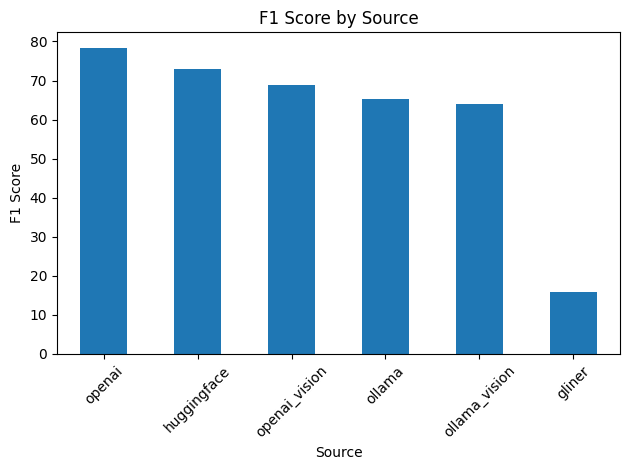

In [212]:
sources = data.copy()
sources.groupby('Source').F1score.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('F1 Score by Source')
plt.xlabel('Source')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()


## TODO Add more indepth breakdown by source family

In [211]:
data["Image"] = data['LLM'].apply(lambda x: True if 'ImageInput' in x else False)
df = data.copy()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'NuExtract:2B'),
  Text(1, 0, 'gpt-4.1-mini'),
  Text(2, 0, 'gemma31b-it-qat'),
  Text(3, 0, 'gpt-4.1'),
  Text(4, 0, 'gpt-4.1-nano'),
  Text(5, 0, 'qwen34b'),
  Text(6, 0, 'granite3.2'),
  Text(7, 0, 'gemma34b'),
  Text(8, 0, 'gemma3ne4b'),
  Text(9, 0, 'qwen2.5vl3b'),
  Text(10, 0, 'llama3.23b'),
  Text(11, 0, 'llama3.21b'),
  Text(12, 0, 'GLiNER:NuNerZero')])

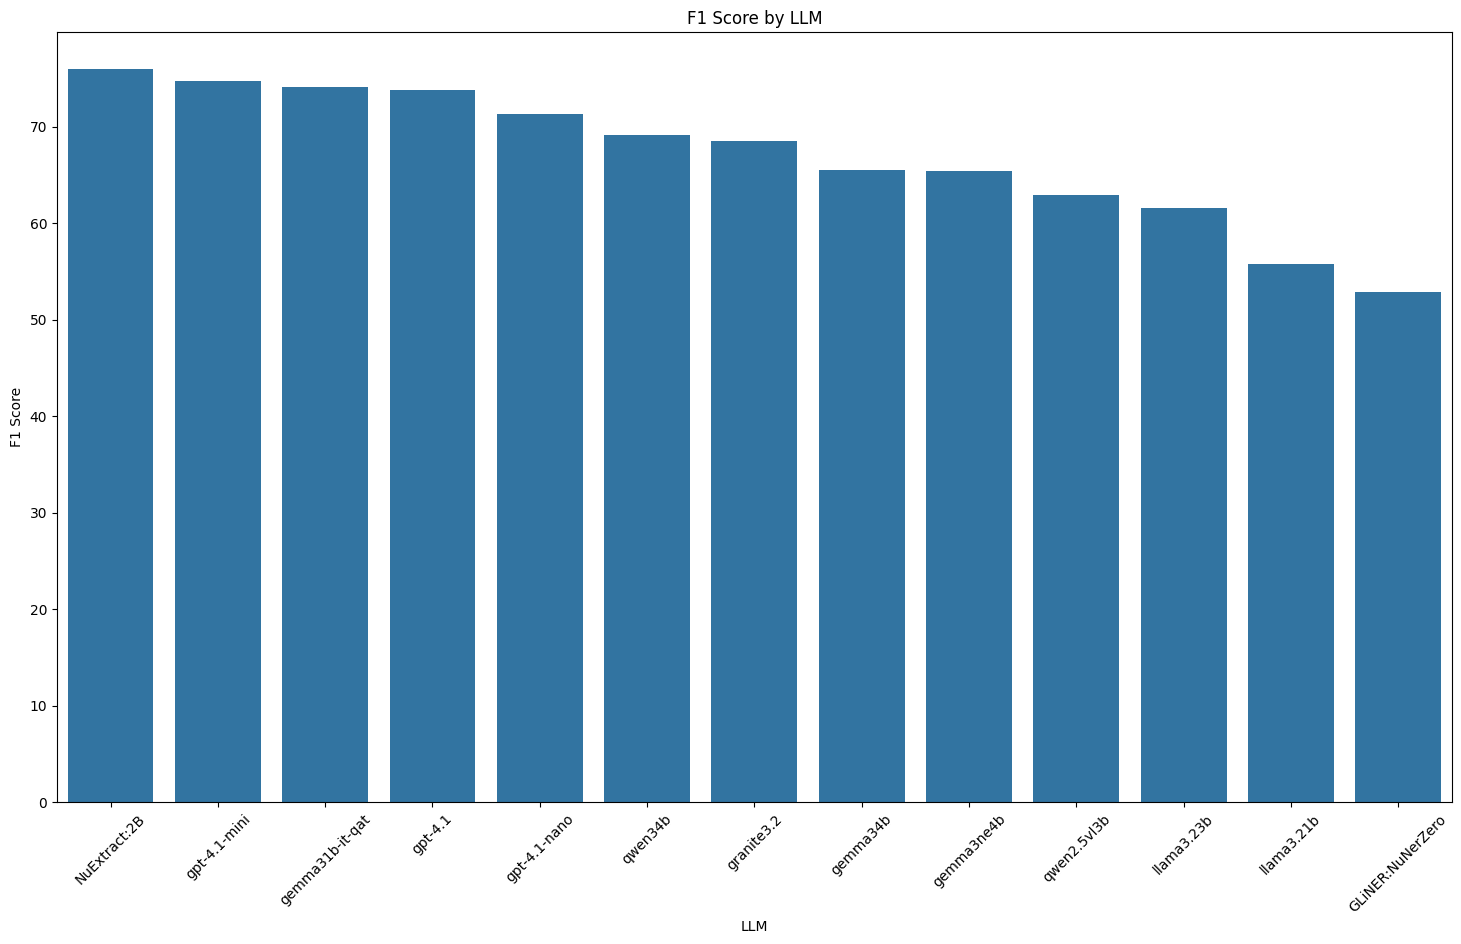

In [210]:
df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', ""))
d = df.groupby('LLM').F1score.mean().sort_values(ascending=False)
plt.figure(figsize=(18, 10))
sns.barplot(x=d.index, y=d.values)
plt.title('F1 Score by LLM')
plt.xlabel('LLM')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

## Compare using the LTNER few-shot prompt or the normal prompt across all models

In [197]:
data.head()
df = data.groupby(['Prompt']).F1score.mean().sort_values(ascending=False)

[Text(0, 0, '70.2438'), Text(0, 0, '66.3437')]

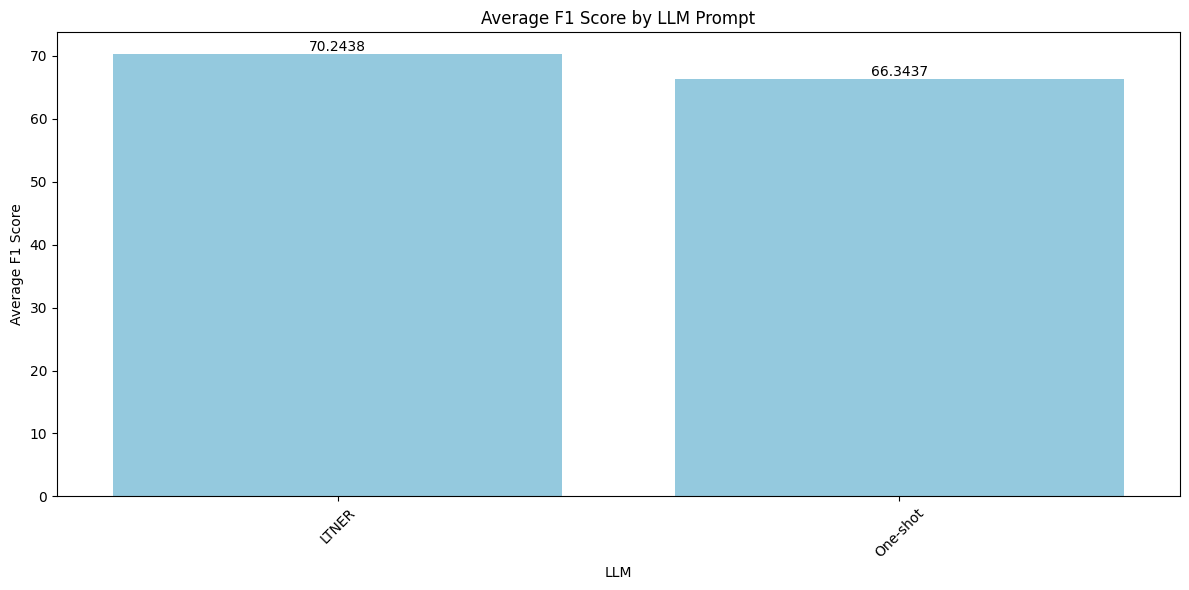

In [198]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x=['LTNER', 'One-shot'], y=df.values, color='skyblue', ax=axes)
plt.title('Average F1 Score by LLM Prompt')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
axes.bar_label(axes.containers[0]) # type: ignore

## F1 scores for all LLM models

In [199]:
df = data.copy()
df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', "*"))
inputType = df.groupby(['LLM', 'Image']).F1score.mean().sort_values(ascending=False)


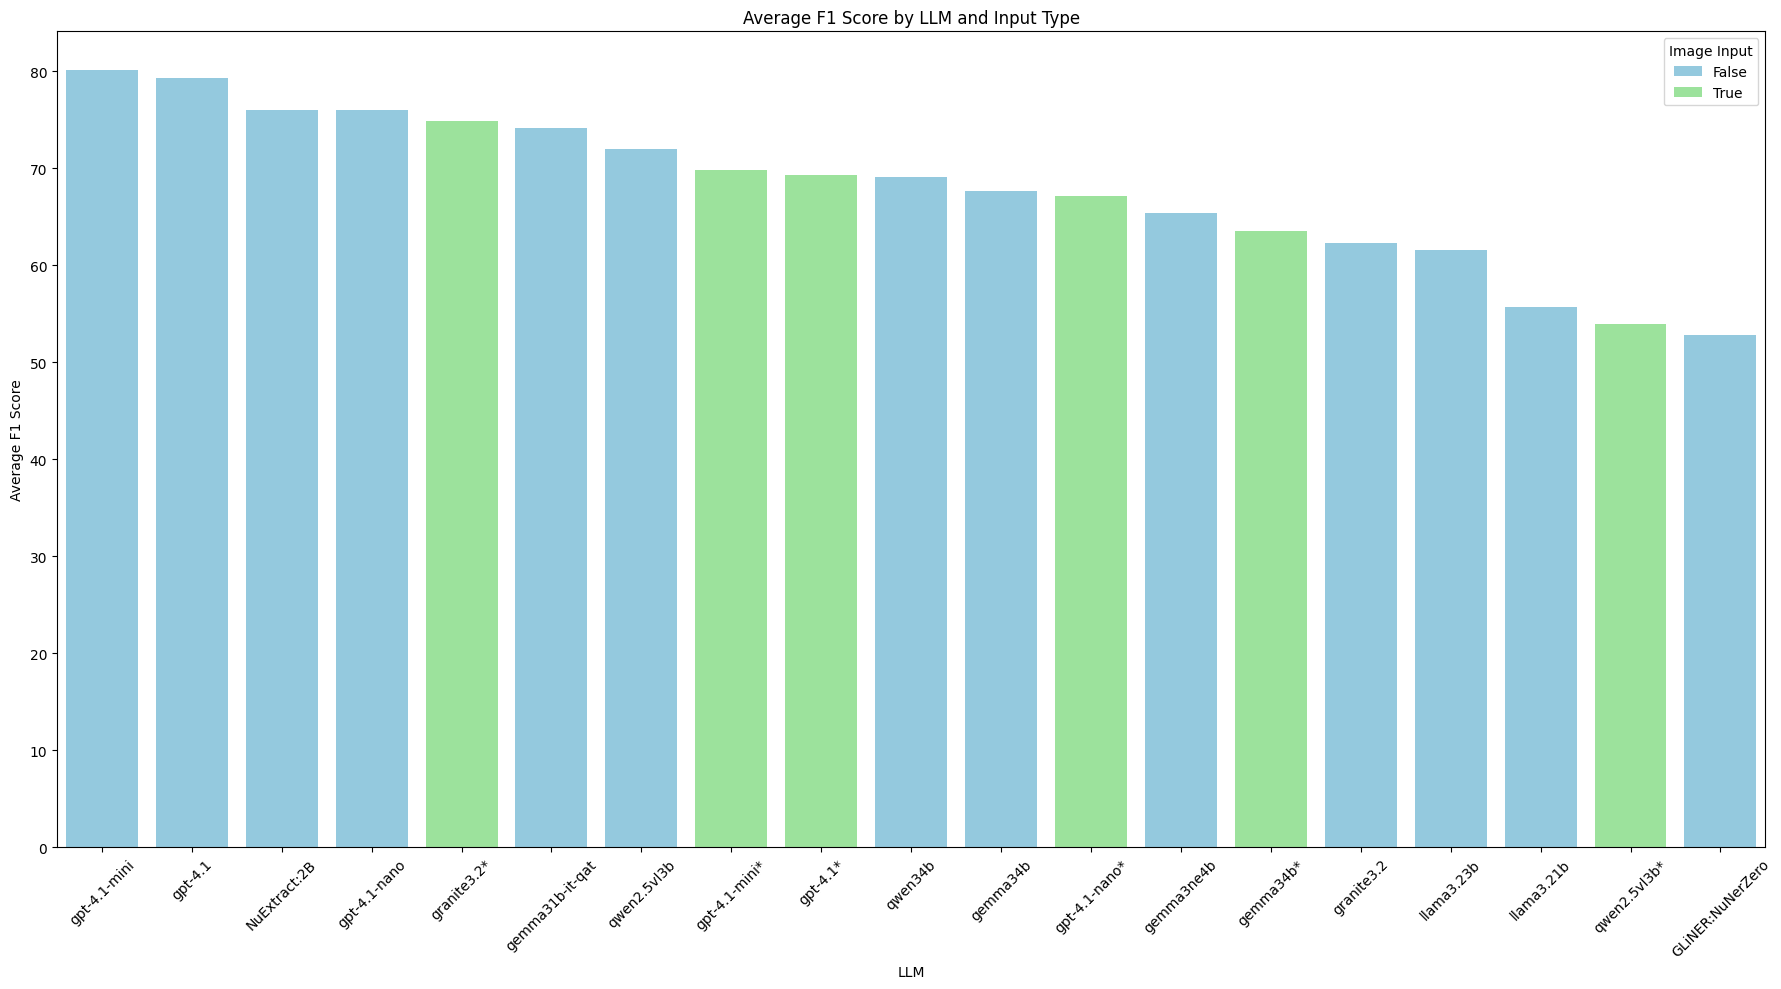

In [200]:
colors = ['skyblue', 'lightgreen']
plt.figure(figsize=(18, 10))
sns.barplot(x=inputType.index.get_level_values(0), y=inputType.values, hue=inputType.index.get_level_values(1), palette=colors)
plt.title('Average F1 Score by LLM and Input Type')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Image Input', loc='upper right')
plt.tight_layout()
plt.show()